In [59]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [53]:
# Cargar el DataFrame limpio
crimes_df = pd.read_csv("./Guardados/clean_crime_rate.csv")

# Muestreo de las columnas del DataFrame
crimes_df.head() 


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,lat,lon
0,2015,1,Aguascalientes,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,41.0,...,36.0,43.0,30.0,40.0,40.0,34.0,43.0,26.0,21.8818,-102.2916
1,2015,1,Aguascalientes,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,201.0,...,121.0,166.0,160.0,151.0,178.0,133.0,121.0,107.0,21.8818,-102.2916
2,2015,1,Aguascalientes,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,19.0,...,13.0,19.0,12.0,15.0,19.0,22.0,10.0,8.0,21.8818,-102.2916
3,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),1.0,...,3.0,0.0,0.0,3.0,2.0,1.0,4.0,2.0,21.8818,-102.2916
4,2015,1,Aguascalientes,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,21.8818,-102.2916


Ahora lo que haremos, sera flitrar el DataFrame por una entidad en específico. Esto ya que lo que buscamos en nuestra solución es ver patrones dependiendo de su area geográfica. Para este documento lo haremos con una Entidad en específico pero en el streamlit, se reflejara dependiendo del estado que el usuario escoga

In [54]:
# Filtrado de Dataframe con Entidad
crimes_df_filtered = crimes_df[crimes_df['Entidad'] == 'Colima']
# Muestreo de las columnas del DataFrame
crimes_df_filtered.head() 


,Año,Clave_Ent,Entidad,Bien jurídico afectado,Tipo de delito,Subtipo de delito,Modalidad,Sexo/Averiguación previa,Rango de edad,Enero,...,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,lat,lon
1440,2015,6,Colima,El patrimonio,Abuso de confianza,Abuso de confianza,Abuso de confianza,Averiguación previa,No aplica,4.0,...,4.0,3.0,1.0,2.0,3.0,3.0,2.0,4.0,19.2452,-103.7241
1441,2015,6,Colima,El patrimonio,Daño a la propiedad,Daño a la propiedad,Daño a la propiedad,Averiguación previa,No aplica,6.0,...,13.0,13.0,7.0,12.0,8.0,9.0,19.0,15.0,19.2452,-103.7241
1442,2015,6,Colima,El patrimonio,Despojo,Despojo,Despojo,Averiguación previa,No aplica,4.0,...,8.0,10.0,2.0,5.0,1.0,6.0,1.0,4.0,19.2452,-103.7241
1443,2015,6,Colima,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Adultos (18 y más),0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,19.2452,-103.7241
1444,2015,6,Colima,El patrimonio,Extorsión,Extorsión,Extorsión,Hombre,Menores de edad (0-17),0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.2452,-103.7241


Para nuestro caso, elegimos que las columnas que nos eran más relevantes para categorizar por grupos fueron 'Tipo de delito', 'Subtipo de delito', 'Sexo/Averiguación previa', 'Rango de edad', 'Bien jurídico afectado', 'Cantidad'

In [55]:
#Conversión de datos de categorías a numéricos por medio de LabelEncoder
# Crear instancias de LabelEncoder
le_delito = LabelEncoder()
le_subtipo = LabelEncoder()
le_sexo = LabelEncoder()
le_edad = LabelEncoder()
le_bien = LabelEncoder()

# Codificar las columnas categóricas para el subconjunto de datos filtrado
crimes_df_filtered['Tipo de delito_codificado'] = le_delito.fit_transform(crimes_df_filtered['Tipo de delito'])
crimes_df_filtered['Subtipo de delito_codificado'] = le_subtipo.fit_transform(crimes_df_filtered['Subtipo de delito'])
crimes_df_filtered['Sexo_codificado'] = le_sexo.fit_transform(crimes_df_filtered['Sexo/Averiguación previa'])
crimes_df_filtered['Rango de edad_codificado'] = le_edad.fit_transform(crimes_df_filtered['Rango de edad'])
crimes_df_filtered['Bien jurídico afectado_codificado'] = le_bien.fit_transform(crimes_df_filtered['Bien jurídico afectado'])

# Crear una columna de cantidad sumando los meses o la columna correspondiente
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
crimes_df_filtered['Cantidad'] = crimes_df_filtered[meses].sum(axis=1)

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/301550191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df_filtered['Tipo de delito_codificado'] = le_delito.fit_transform(crimes_df_filtered['Tipo de delito'])
/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/301550191.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df_filtered['Subtipo de delito_codificado'] = le_subtipo.fit_transform(crimes_df_filtered['Subtipo de delito'])
/var/folders/1w/lw2b9k0s0

In [61]:
#Normalización de datos usando StandardScaler
numerical_columns = ['Cantidad'] 
categorical_columns = ['Tipo de delito_codificado', 'Subtipo de delito_codificado', 'Sexo_codificado', 'Rango de edad_codificado', 'Bien jurídico afectado_codificado']

scaler = StandardScaler()
# Normalizacion de todas las columnas
crimes_df_scaled_filtered = pd.DataFrame(scaler.fit_transform(crimes_df_filtered[numerical_columns + categorical_columns]), 
                                          columns=numerical_columns + categorical_columns)

display(crimes_df_scaled_filtered.head())


,Cantidad,Tipo de delito_codificado,Subtipo de delito_codificado,Sexo_codificado,Rango de edad_codificado,Bien jurídico afectado_codificado
0,-0.104492,-2.637467,-1.917567,-1.492311,0.177789,-2.080826
1,0.204274,-1.986799,-1.429582,-1.492311,0.177789,-2.080826
2,-0.064466,-1.596397,-1.290158,-1.492311,0.177789,-2.080826
3,-0.190260,-1.205996,-1.081022,-0.415154,-1.328187,-2.080826
4,-0.213131,-1.205996,-1.081022,-0.415154,-0.575199,-2.080826


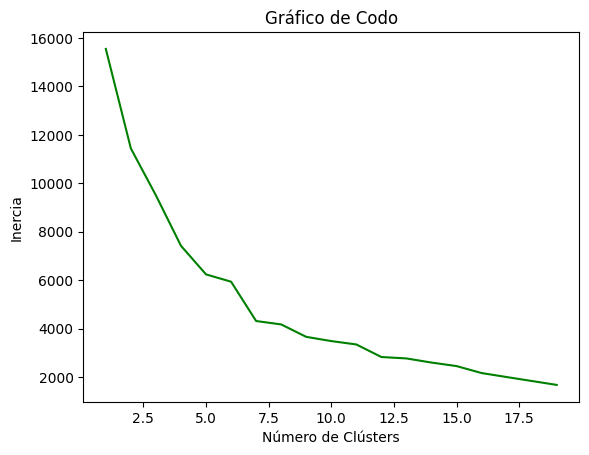

In [62]:
# Definición de los valores X
X = np.array(crimes_df_scaled_filtered[['Tipo de delito_codificado', 'Subtipo de delito_codificado', 'Sexo_codificado', 'Rango de edad_codificado', 'Bien jurídico afectado_codificado', 'Cantidad']])

# Determinación del valor K
# Define el rango de valores para K (el número de clusters) que se probarán
Nc = range(1, 20) 

# Crea una lista de objetos KMeans, cada uno configurado con un número diferente de clusters
kmeans = [KMeans(n_clusters=i, random_state=42) for i in Nc] 

# Calcula y almacena la inercia para diferentes valores de K, que se usará para trazar el gráfico de codo
inertia = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

# Gráfico de Codo
plt.plot(Nc, inertia, color='green')
plt.xlabel('Número de Clústers')
plt.ylabel('Inercia')
plt.title('Gráfico de Codo')
plt.show()



Los valores de los centroides son: 
 [[ 0.9458951   0.89601345 -1.49231107  0.17778887 -1.93771451  0.68950971]
 [-0.52821643 -0.56399022  0.16830576 -0.9673806   0.16770833 -0.17789759]
 [-0.81559508 -0.7473728  -0.28266967  0.73346995  0.23420706  0.09535936]
 [ 1.20041107  1.25604785  0.29117816 -0.08143656  0.72469958 -0.20718961]
 [-0.41073459 -0.48975975  1.69926482  1.6558767   0.21601938 -0.183589  ]]


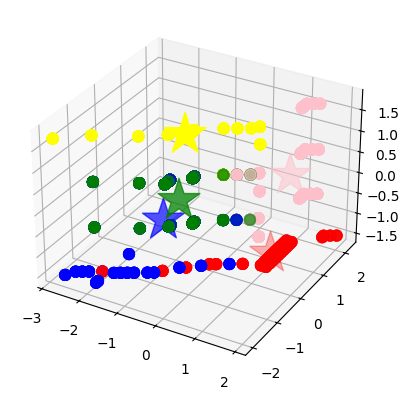

In [63]:
"""
Para nuestro ejemplo, seleccionamos el valor de K = 5f ya que es donde aproximadamente comienza
a suavizarse.
"""

# Entrenamiento del modelo
#Aplicación del Modelo K-Means
kmeans = KMeans(n_clusters = 5).fit(X)
#kmeans.cluster_centers_almacena las coordenadas de los centroides de los clusters generados por el modelo.
centroids = kmeans.cluster_centers_
print("Los valores de los centroides son: \n", centroids)

#Etiquetas de cada punto de los datos
labels = kmeans.predict(X)
#Determinación de los centroides
C = kmeans.cluster_centers_

colores = ['red','green','blue','pink','yellow'] 
asignar = []
for row in labels:
    asignar.append(colores[row])

#Gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = asignar, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', c = colores, s = 1000)
plt.show()

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/2787715611.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


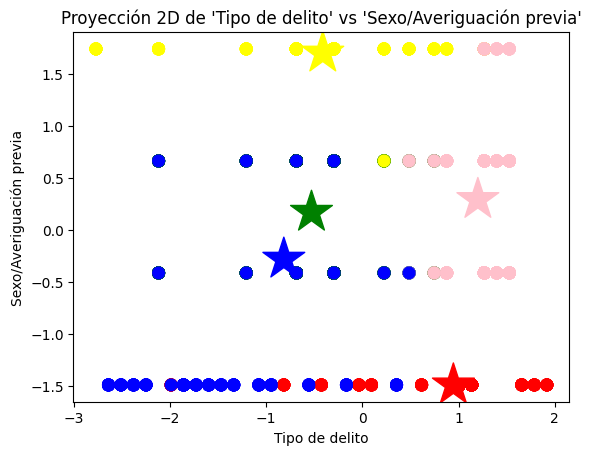

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/2787715611.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


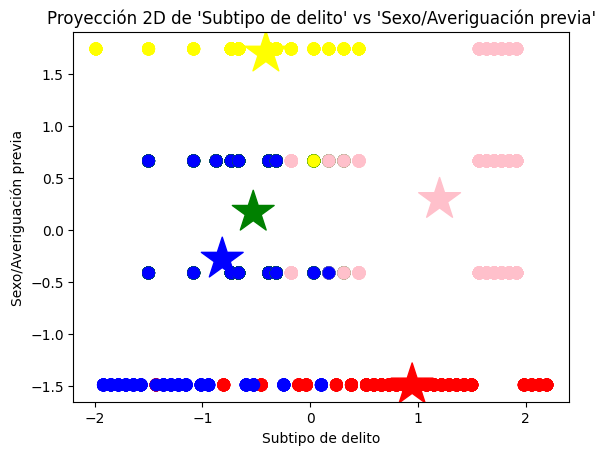

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/2787715611.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


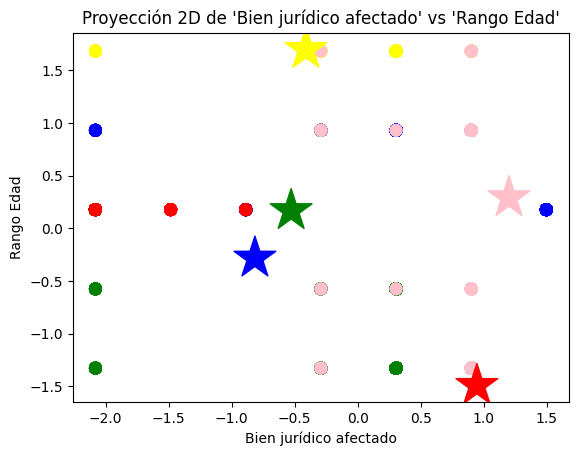

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/2787715611.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)


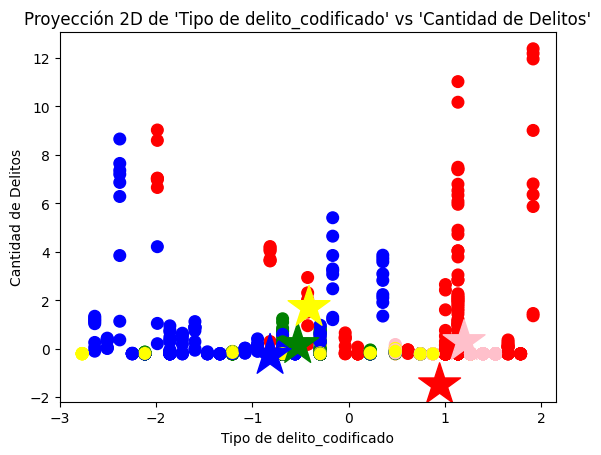

In [65]:
# Proyección a 2D con 'Sexo/Averiguación previa' y 'Tipo de delito'
f1 = crimes_df_scaled_filtered['Tipo de delito_codificado'].values
f2 = crimes_df_scaled_filtered['Sexo_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  
plt.xlabel("Tipo de delito")
plt.ylabel("Sexo/Averiguación previa")
plt.title("Proyección 2D de 'Tipo de delito' vs 'Sexo/Averiguación previa'")
plt.show()

# Proyección a 2D con 'Subtipo de delito' y 'Sexo/Averiguación previa'
f1 = crimes_df_scaled_filtered['Subtipo de delito_codificado'].values
f2 = crimes_df_scaled_filtered['Sexo_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000) 
plt.xlabel("Subtipo de delito")
plt.ylabel("Sexo/Averiguación previa")
plt.title("Proyección 2D de 'Subtipo de delito' vs 'Sexo/Averiguación previa'")
plt.show()

# Proyección a 2D con 'Rango de edad' y 'Bien jurídico afectado'
f1 = crimes_df_scaled_filtered['Bien jurídico afectado_codificado'].values
f2 = crimes_df_scaled_filtered['Rango de edad_codificado'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  
plt.xlabel("Bien jurídico afectado")
plt.ylabel("Rango Edad")
plt.title("Proyección 2D de 'Bien jurídico afectado' vs 'Rango Edad'")
plt.show()


# Proyección a 2D con 'Tipo de delito' y 'Cantidad'
f1 = crimes_df_scaled_filtered['Tipo de delito_codificado'].values
f2 = crimes_df_scaled_filtered['Cantidad'].values

# Gráfico de Proyección 2D
plt.scatter(f1, f2, c=asignar, s=70, cmap=colores)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)  # Centros de los clústeres en color negro
plt.xlabel("Tipo de delito_codificado")
plt.ylabel("Cantidad de Delitos")
plt.title("Proyección 2D de 'Tipo de delito' vs 'Cantidad de Delitos'")
plt.show()


In [66]:
# Crear un DataFrame con las etiquetas de los clusters
copy = pd.DataFrame()
copy['label'] = labels

# Contar los usuarios por cada cluster
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = copy.groupby('label').size().values

# Mostrar el número de usuarios por cada cluster
print("La cantidad de usuarios en cada clúster es:")
display(cantidadGrupo)


La cantidad de usuarios en cada clúster es:


,color,cantidad
0,red,375
1,green,864
2,blue,561
3,pink,549
4,yellow,243


In [69]:
crimes_df_filtered['Cluster'] = kmeans.predict(X)
# Crear un diccionario para mapear las categorías originales de las columnas codificadas
category_mapping = {
    'Tipo de delito1': le_delito.classes_,
    'Subtipo de delito1': le_subtipo.classes_,
    'Sexo1': le_sexo.classes_,
    'Rango de edad1': le_edad.classes_,
    'Bien jurídico afectado1': le_bien.classes_
}

# 6. Ahora vamos a iterar sobre cada cluster y determinar el delito más representativo
for i in range(kmeans.n_clusters):
    print(f"Cluster {i}:")

    # Filtrar los datos que pertenecen a este cluster
    cluster_data = crimes_df_filtered[crimes_df_filtered['Cluster'] == i]

    # Imprimir la cantidad de registros en este cluster
    print(f"Cantidad de registros en el cluster {i}: {cluster_data.shape[0]}")
    
    # Analizar las categorías más comunes dentro de este cluster
    most_common_delito = cluster_data['Tipo de delito_codificado'].mode()[0]
    most_common_subtipo = cluster_data['Subtipo de delito_codificado'].mode()[0]
    most_common_sexo = cluster_data['Sexo_codificado'].mode()[0]
    most_common_edad = cluster_data['Rango de edad_codificado'].mode()[0]
    most_common_bien = cluster_data['Bien jurídico afectado_codificado'].mode()[0]
    
    # Decodificar los valores de las categorías para entender mejor los resultados
    print(f"Delito más común: {category_mapping['Tipo de delito1'][most_common_delito]}")
    print(f"Subtipo de delito más común: {category_mapping['Subtipo de delito1'][most_common_subtipo]}")
    print(f"Sexo más común: {category_mapping['Sexo1'][most_common_sexo]}")
    print(f"Rango de edad más común: {category_mapping['Rango de edad1'][most_common_edad]}")
    print(f"Bien jurídico afectado más común: {category_mapping['Bien jurídico afectado1'][most_common_bien]}")
    
    print("\n")
    
    # Mostrar el centroide de cada cluster
    print("-" * 50)






Cluster 0:
Cantidad de registros en el cluster 0: 375
Delito más común: Robo con violencia
Subtipo de delito más común: Otros robos
Sexo más común: Averiguación previa
Rango de edad más común: No aplica
Bien jurídico afectado más común: El patrimonio


--------------------------------------------------
Cluster 1:
Cantidad de registros en el cluster 1: 864
Delito más común: Homicidio
Subtipo de delito más común: Homicidio culposo
Sexo más común: Mujer
Rango de edad más común: Adultos (18 y más)
Bien jurídico afectado más común: La vida y la Integridad corporal


--------------------------------------------------
Cluster 2:
Cantidad de registros en el cluster 2: 561
Delito más común: Homicidio
Subtipo de delito más común: Homicidio culposo
Sexo más común: Mujer
Rango de edad más común: No especificado
Bien jurídico afectado más común: La vida y la Integridad corporal


--------------------------------------------------
Cluster 3:
Cantidad de registros en el cluster 3: 549
Delito más comú

/var/folders/1w/lw2b9k0s0sx4n43y98tvw9pc0000gn/T/ipykernel_55077/252360733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df_filtered['Cluster'] = kmeans.predict(X)


En esta sección evaluaremos el desempeño usando Silhouette Score y Davies-Bouldin Index ya que es un algortimo de clustering no supervisado.
- Silhouette Score: Evalúa que tan bien están agrupados los puntos en sus respectivos clusters.
- Davies-Bouldin Index: Evalúa la relación entre la dispersión dentro de los clústeres y la separación entre ellos.

Silhouette Score: 0.38
Davies-Bouldin Index: 1.10


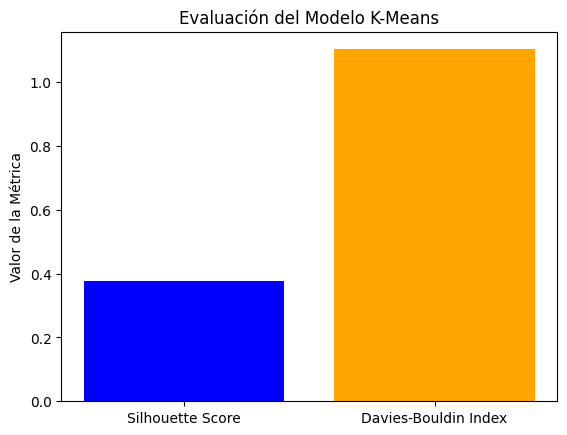

In [67]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calcular métricas de evaluación
silhouette_avg = silhouette_score(X, labels)
davies_bouldin = davies_bouldin_score(X, labels)

# Mostrar resultados
print(f"Silhouette Score: {silhouette_avg:.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.2f}")

# Visualización de las métricas (gráfico de barras)
metrics = ['Silhouette Score', 'Davies-Bouldin Index']
values = [silhouette_avg, davies_bouldin]

plt.bar(metrics, values, color=['blue', 'orange'])
plt.title('Evaluación del Modelo K-Means')
plt.ylabel('Valor de la Métrica')
plt.show()

# El resultado de Silhouette Score indica un agrupamiento razonable
# El resultado de Davies-Bouldin Index indica una buena separación y compactación entre clústeres. (clústers bien formados)